In [1]:
# importing the dataset 
import pandas as pd
import numpy as np
from sklearn import preprocessing 

df = pd.read_csv('dep.csv')
df.head() 

,sex,age,marital_status,children,household_size,years_of_edu,hh_children,cons_nondurable,asset_durable,asset_phone,...,fs_meat,fs_enoughtom,fs_sleephun,med_sickdays_hhave,med_u5_deaths,ed_expenses,ed_schoolattend,durable_investment,nondurable_investment,depressed
0,1,21.0,0,3,4,10,3,357.817690,208.199810,40.038425,...,3.000000,0.0,1.0,1.000000,0.0,0.000000,0.0,569.850340,48.166222,0.0
1,1,44.0,1,6,8,6,6,233.441540,11.691220,0.000000,...,5.000000,0.0,0.0,2.750000,0.0,18.257523,0.8,252.650100,14.711897,0.0
2,1,23.0,1,1,3,7,1,171.970760,120.916050,56.053795,...,2.000000,0.0,1.0,2.666667,0.0,8.648300,1.0,141.736020,0.720692,0.0
3,1,67.0,0,0,1,1,0,37.013428,32.831509,0.000000,...,1.000000,0.0,1.0,3.000000,0.0,0.000000,0.0,58.287693,4.804611,1.0
4,1,28.0,1,4,6,10,0,0.000000,0.000000,0.000000,...,3.068881,0.0,0.0,1.438596,0.0,0.000000,0.0,0.000000,0.000000,0.0


In [2]:
#df = df.reset_index()

In [3]:
#df.round(0) 

In [4]:
#def clean_dataset(df):
    #assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    #df.dropna(inplace=True)
    #indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    #return df[indices_to_keep].astype(np.float64)

In [5]:
#df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [6]:
#df.fillna(0)

In [7]:
X = df.drop(columns = ["depressed"])
#X=X1.drop("no_lasting_investmen", axis=1)
y = df["depressed"]
print(X.shape, y.shape)

(1147, 34) (1147,)


In [8]:
 # Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [9]:
 # Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
### END SOLUTION

In [10]:
 # Fit the model to the training data and calculate the scores for the training and testing data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

### BEGIN SOLUTION
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [11]:
X_train_scaled

array([[1.        , 0.13513514, 1.        , ..., 0.44444446, 0.04991981,
        0.01685585],
       [1.        , 0.14864865, 1.        , ..., 0.5       , 0.05760247,
        0.00334317],
       [1.        , 0.10810811, 1.        , ..., 0.5       , 0.3572761 ,
        0.05815363],
       ...,
       [1.        , 0.12162162, 1.        , ..., 0.66666667, 0.20215026,
        0.0021325 ],
       [1.        , 0.22972973, 1.        , ..., 0.        , 0.11233373,
        0.00504018],
       [1.        , 0.06756757, 1.        , ..., 0.        , 0.04865171,
        0.        ]])

In [12]:
X_test_scaled

array([[1.        , 0.08108108, 1.        , ..., 0.66666667, 0.09557966,
        0.01362441],
       [1.        , 0.08108108, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.14864865, 1.        , ..., 0.5       , 0.11555093,
        0.01885863],
       ...,
       [1.        , 0.09459459, 1.        , ..., 0.66666667, 0.0598369 ,
        0.00278842],
       [1.        , 0.02702703, 1.        , ..., 0.        , 0.06519543,
        0.        ],
       [1.        , 0.41891892, 1.        , ..., 0.        , 0.        ,
        0.        ]])

In [13]:
#X_train_round = X_train_scaled.round(2)
#X_train_round = X_train_round.fillna()

In [14]:
model.fit(X_train_scaled, y_train)



training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8395348837209302
Testing Score: 0.7979094076655052


In [15]:
coef = model.coef_[0]
print (coef)

[ 2.79583482e-01  8.62005209e-01  3.96666643e-02  3.54521856e-01
  1.78350421e-01 -1.13750569e+00  9.50709787e-02  5.75088288e-02
 -2.54627608e-01  1.22923316e-02  1.14588989e-03 -4.80591948e-01
 -1.79509786e-02  6.11769983e-01  4.06498053e-01  3.28749664e-01
  6.40036586e-02  6.40156461e-02 -4.60498894e-02 -9.06382892e-02
  3.41182017e-01 -3.50465952e-01 -3.86169908e-01  1.84102084e+00
  2.69300482e-01  7.95067938e-01 -2.64216464e-01 -1.21113485e-01
  5.39566362e-01  3.56752350e-02  2.55071980e-01 -3.79797822e-01
  4.68621920e-01 -3.05175532e-01]


In [16]:
from sklearn.metrics import r2_score
r2_score

<function sklearn.metrics._regression.r2_score(y_true, y_pred, sample_weight=None, multioutput='uniform_average')>

In [17]:
from sklearn.metrics import r2_score

In [18]:
predictions2 = model.predict(X_train_scaled)

In [19]:
predictions = model.predict(X_test_scaled)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
training_score = r2_score(predictions2, y_train)


In [21]:
testing_score = r2_score(predictions, y_test)

In [22]:
training_score

-22.16159250585481

In [23]:
testing_score

-13.704946996466436

In [24]:
predictionvsactual = pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [25]:
predictionvsactual

,Prediction,Actual
290,0.0,0.0
1112,0.0,0.0
852,0.0,0.0
413,0.0,0.0
1138,0.0,0.0
...,...,...
308,0.0,0.0
47,0.0,0.0
106,0.0,1.0
55,0.0,0.0


In [26]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
  
actual = y_test
predicted = predictions
results = confusion_matrix(predicted, actual)

In [27]:
results

array([[229,  54],
       [  4,   0]], dtype=int64)

In [32]:
sensitivity1 = results[1,1]/(results[0,1]+results[1,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = results[0,0]/(results[0,0]+results[1,0])
print('Specificity : ', specificity1)

Sensitivity :  0.0
Specificity :  0.9828326180257511


ValueError: x and y must be the same size

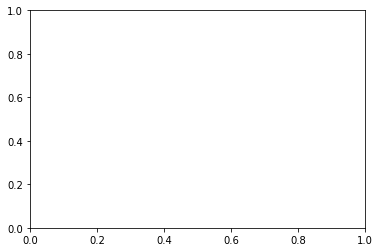

In [34]:
import matplotlib.pyplot as plt
plt.scatter(X_test,y_test)
plt.xlabel("Credit Balance")
plt.ylabel("Probability of Default")